In [ ]:
from IPython.display import IFrame

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Zamlar Öngörülebilir mi?/pivot.csv",
                 sep="|",
                 header=None,
                 skiprows=4)
df.head(10)

,0,1,2,3,4
0,2005.0,01-Ocak,0441001. (Su Faturası),2.2301,NaN
1,NaN,NaN,0451001. (Elektrik Ücreti),0.1600,NaN
2,NaN,NaN,0452101. (Doğal Gaz),0.4100,NaN
3,NaN,NaN,0830009. (İnternet Ücreti),13.6864,NaN
4,NaN,02-Şubat,0441001. (Su Faturası),2.2301,NaN
5,NaN,NaN,0451001. (Elektrik Ücreti),0.1600,NaN
6,NaN,NaN,0452101. (Doğal Gaz),0.4100,NaN
7,NaN,NaN,0830009. (İnternet Ücreti),13.6917,NaN
8,NaN,03-Mart,0441001. (Su Faturası),2.2301,NaN
9,NaN,NaN,0451001. (Elektrik Ücreti),0.1600,NaN


In [4]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 22.6 MB 19.4 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.5 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357486 sha256=53c66a555ca576a4b719328cd0b832c87e3acff1133ea809b1b6d4145703708d
  Stored in directory: /tmp/pip-ephem-wheel-cache-_ykralc3/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=58d149484144b8d9066401d17b89e0615a156c7f12fa20574d8b501f5d06196a
  Stored in directory: /roo

In [2]:
#Columnları isimlendirmek
cols = ["Year", "Month", "Product", "Price", "Extra"]
df.columns = cols
#İşe yaramayan columnları silmek
df.drop(axis=1, columns=["Extra"], inplace=True)

In [ ]:
df.head()

,Year,Month,Product,Price
0,2005.0,01-Ocak,0441001. (Su Faturası),2.2301
1,NaN,NaN,0451001. (Elektrik Ücreti),0.1600
2,NaN,NaN,0452101. (Doğal Gaz),0.4100
3,NaN,NaN,0830009. (İnternet Ücreti),13.6864
4,NaN,02-Şubat,0441001. (Su Faturası),2.2301


In [5]:
import pandas_profiling
import re

#Bu method NaN yazan değerleri kendisinden bir önceki satırda yazan veriyle doldurur
#Böylece 2005-2006 arasındaki NaN değerleri 2005 yapmış olacağız
df = df.fillna(method="ffill")

#Veri temizleme ve regex
#Burada 2.sütundaki yalnızca ne faturası olduğunu belirten parantez içindeki ifadenin
#alınmasını sağlıyoruz.
pattern = r'.*\((.*)\)+'
df["Product"] = df["Product"].apply(lambda x: re.search(pattern, x).group(1))
df["Product"] = df["Product"].apply(lambda x: x.replace(')',''))

df["Year"] = df["Year"].astype(int)
df["Month"] = df["Month"].apply(lambda x: int(str(x)[:2]))

#Dataset infosu almak için kullanılır
pandas_profiling.ProfileReport(df)

<ipython-input-5-420833a52b42>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df_pivot = df.pivot_table("Price",["Year","Month"],"Product")
df_pivot

Product     Doğal Gaz  Elektrik Ücreti  Su Faturası  İnternet Ücreti
Year Month                                                          
2005 1         0.4100           0.1600       2.2301          13.6864
     2         0.4100           0.1600       2.2301          13.6917
     3         0.4300           0.1600       2.2301          13.6917
     4         0.4300           0.1600       2.2301          13.9496
     5         0.4300           0.1600       2.0411          14.2074
...               ...              ...          ...              ...
2021 12        2.2893           0.9172       7.3848          75.3537
2022 1         2.7788           1.5562       7.5675          76.2700
     2         2.8851           1.4809       7.3412          77.5432
     3         2.9544           1.3372       7.1217          79.0905
     4         3.7755           1.3372       9.4715          81.5053

[208 rows x 4 columns]

In [ ]:
#Correlation çıkarmak, böylece ürünler arası ilişki incelenmiş oluyor.
#Örneğin aşağıdaki çıktı için doğalgazdaki 1 artış elektrikte 0.974183'lük bir artışa sebep oluyor demek.
corr = df_pivot.corr()
print(corr.unstack())
corr

Product          Product        
Doğal Gaz        Doğal Gaz          1.000000
                 Elektrik Ücreti    0.974183
                 Su Faturası        0.866066
                 İnternet Ücreti    0.412973
Elektrik Ücreti  Doğal Gaz          0.974183
                 Elektrik Ücreti    1.000000
                 Su Faturası        0.851136
                 İnternet Ücreti    0.348441
Su Faturası      Doğal Gaz          0.866066
                 Elektrik Ücreti    0.851136
                 Su Faturası        1.000000
                 İnternet Ücreti    0.366410
İnternet Ücreti  Doğal Gaz          0.412973
                 Elektrik Ücreti    0.348441
                 Su Faturası        0.366410
                 İnternet Ücreti    1.000000
dtype: float64


Product,Doğal Gaz,Elektrik Ücreti,Su Faturası,İnternet Ücreti
Product,,,,
Doğal Gaz,1.000000,0.974183,0.866066,0.412973
Elektrik Ücreti,0.974183,1.000000,0.851136,0.348441
Su Faturası,0.866066,0.851136,1.000000,0.366410
İnternet Ücreti,0.412973,0.348441,0.366410,1.000000


Burada correlation değerlerini görselleştiriyoruz

Product          Product        
Doğal Gaz        Doğal Gaz          1.000000
Elektrik Ücreti  Elektrik Ücreti    1.000000
Su Faturası      Su Faturası        1.000000
İnternet Ücreti  İnternet Ücreti    1.000000
Doğal Gaz        Elektrik Ücreti    0.974183
Elektrik Ücreti  Doğal Gaz          0.974183
Doğal Gaz        Su Faturası        0.866066
Su Faturası      Doğal Gaz          0.866066
Elektrik Ücreti  Su Faturası        0.851136
Su Faturası      Elektrik Ücreti    0.851136
Doğal Gaz        İnternet Ücreti    0.412973
İnternet Ücreti  Doğal Gaz          0.412973
Su Faturası      İnternet Ücreti    0.366410
İnternet Ücreti  Su Faturası        0.366410
Elektrik Ücreti  İnternet Ücreti    0.348441
İnternet Ücreti  Elektrik Ücreti    0.348441
dtype: float64

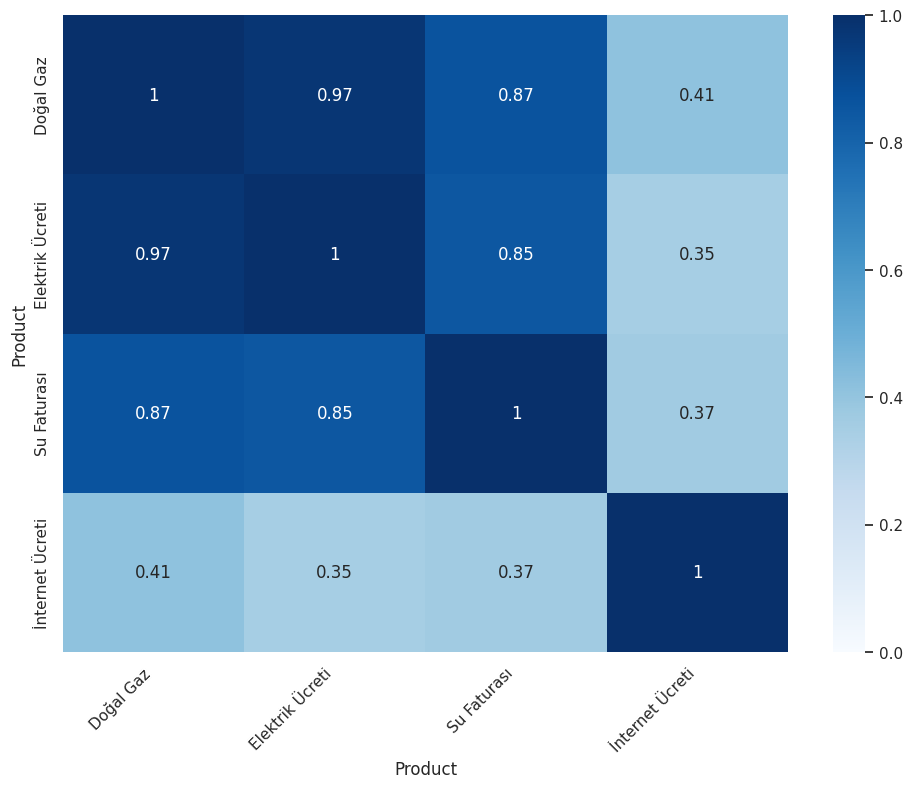

In [ ]:
import seaborn as sns
sns.set(rc={"figure.figsize": (11.7,8.27)})
corr = df_pivot.corr()
ax = sns.heatmap(
    corr,
    cmap = "Blues",
    vmax = 1,
    vmin = 0,
    center = 0.5,
    annot= True
)
ax.set_xticklabels(corr.index, horizontalalignment = "right", rotation=45)

stack = corr.unstack()
stack.sort_values(kind="quicksort", ascending=False)

In [7]:
df = df.loc[df["Product"]== "Elektrik Ücreti"]
df

,Year,Month,Product,Price
1,2005,1,Elektrik Ücreti,0.1600
5,2005,2,Elektrik Ücreti,0.1600
9,2005,3,Elektrik Ücreti,0.1600
13,2005,4,Elektrik Ücreti,0.1600
17,2005,5,Elektrik Ücreti,0.1600
...,...,...,...,...
813,2021,12,Elektrik Ücreti,0.9172
817,2022,1,Elektrik Ücreti,1.5562
821,2022,2,Elektrik Ücreti,1.4809
825,2022,3,Elektrik Ücreti,1.3372


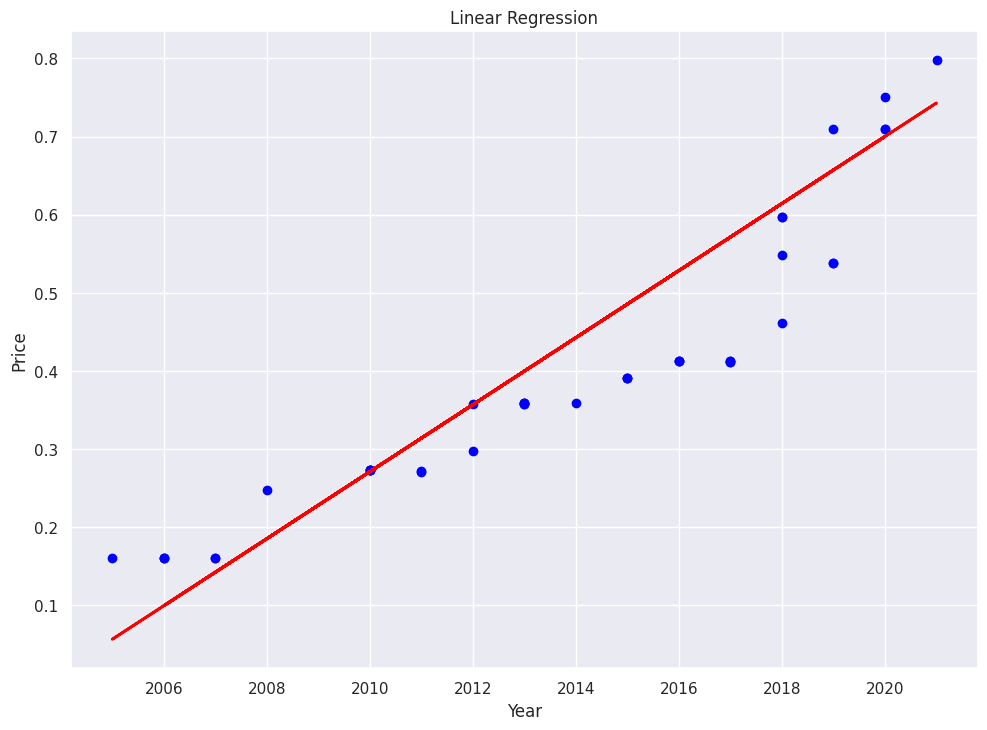

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# df.drop(columns = ["Month","Product"],axis=1, inplace=True)
X = df['Year'].values.reshape(-1, 1)
y = df['Price']

# Veriyi eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Doğrusal regresyon modelini oluştur
model = LinearRegression()

# Modeli eğit
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred = model.predict(X_test)

# Sonuçları görselleştir
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.show()

In [ ]:
print("R score: {0}".format(round(model.score(X_train, y_train),2)))

R score: 0.74


In [ ]:
model_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2 = r2_score(y_test, model_pred)
mse = mean_squared_error(y_test, model_pred)
mae = mean_absolute_error(y_test, model_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.7639037234259689
Mean Squared Error: 0.006758662234073015
Mean Absolute Error: 0.0659578732227914
Root Mean Squared Error: 0.08221108340164977


# **DOĞRULUK DEĞERLERİ DEĞERLENDİRMESİ**
R-kare değeri 0.76, modelin bağımsız değişkenlerin bağımlı değişkenin varyansının yaklaşık %76'sını açıkladığını gösterir. Bu oran genellikle iyi bir tahmin doğruluğu olarak kabul edilir, ancak probleminize ve uygulamanıza bağlı olarak bu değerin yeterli olup olmadığını belirlemelisiniz.

Aynı şekilde, ortalama karesel hata (Mean Squared Error) değeri 0.0067 gibi düşük bir değere sahip. Bu, modelin tahminlerinin gerçek değerlerden ortalama olarak ne kadar uzaklaştığını gösterir. Düşük bir MSE, daha iyi tahminler yapıldığını gösterir.

Ortalama mutlak hata (Mean Absolute Error) ve kök ortalama karesel hata (Root Mean Squared Error) değerleri de oldukça düşük, bu da modelin tahminlerinin gerçek değerlere yakın olduğunu gösterir.

Ancak, tahmin doğruluğunu değerlendirirken her zaman problem bağlamınızı ve gereksinimlerinizi göz önünde bulundurmalısınız. Bazı uygulamalarda daha yüksek bir tahmin doğruluğu gerekebilirken, bazı durumlarda bu değerler oldukça tatmin edici olabilir. Ayrıca, modelinizi daha fazla optimize etmek veya farklı algoritmaları denemek de tahmin doğruluğunu artırabilir.

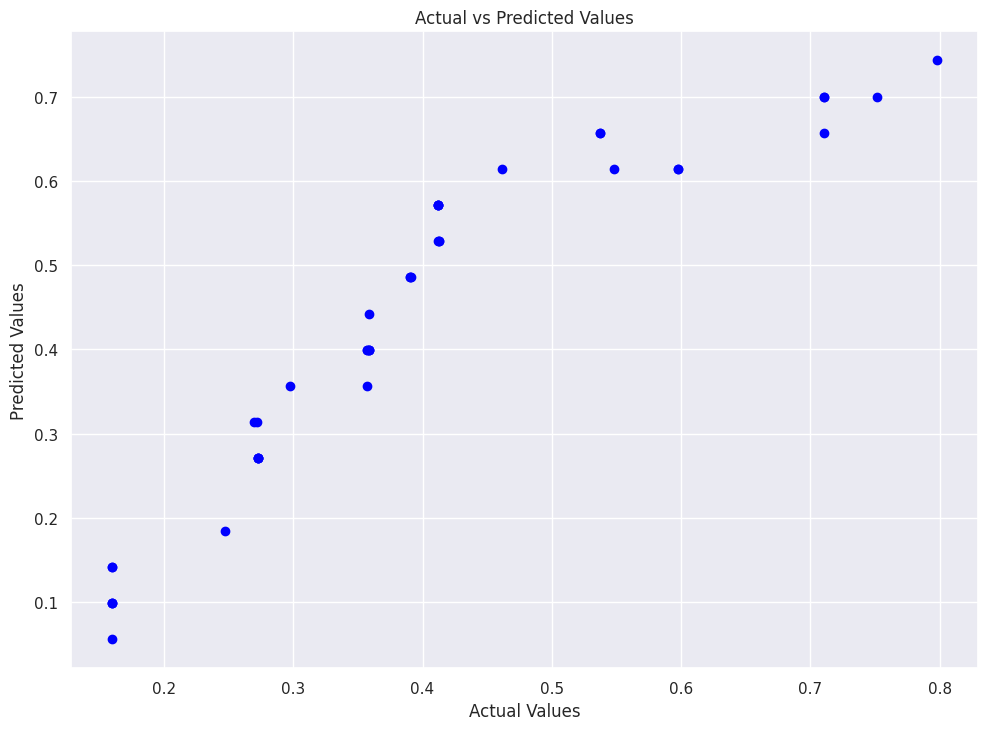

In [ ]:
plt.scatter(y_test, model_pred, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [13]:
#2015 1.ay gibi tutulan verileri tam tarih şekline çevirmek
#Örneğin: 2005-01-01 şekline çevirmek
import datetime
def date_mapping(row):
  return datetime.date(row["Year"], row["Month"], 1)

In [14]:
df["Date"] = df.apply(lambda x: date_mapping(x), axis=1)
df_sub = df[["Date","Price"]].reset_index(drop=True)
df_sub.head(10)

<ipython-input-14-6c6fdcfa3ee4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df.apply(lambda x: date_mapping(x), axis=1)


,Date,Price
0,2005-01-01,0.16
1,2005-02-01,0.16
2,2005-03-01,0.16
3,2005-04-01,0.16
4,2005-05-01,0.16
5,2005-06-01,0.16
6,2005-07-01,0.16
7,2005-08-01,0.16
8,2005-09-01,0.16
9,2005-10-01,0.16


In [19]:
df["Date"] = df.apply(lambda x: date_mapping(x), axis=1)
df.drop(axis=1, columns=["Year","Month"], inplace=True)
df.head(10)

<ipython-input-19-fd730942bb0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df.apply(lambda x: date_mapping(x), axis=1)
<ipython-input-19-fd730942bb0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(axis=1, columns=["Year","Month"], inplace=True)


,Product,Price,Date
1,Elektrik Ücreti,0.16,2005-01-01
5,Elektrik Ücreti,0.16,2005-02-01
9,Elektrik Ücreti,0.16,2005-03-01
13,Elektrik Ücreti,0.16,2005-04-01
17,Elektrik Ücreti,0.16,2005-05-01
21,Elektrik Ücreti,0.16,2005-06-01
25,Elektrik Ücreti,0.16,2005-07-01
29,Elektrik Ücreti,0.16,2005-08-01
33,Elektrik Ücreti,0.16,2005-09-01
37,Elektrik Ücreti,0.16,2005-10-01


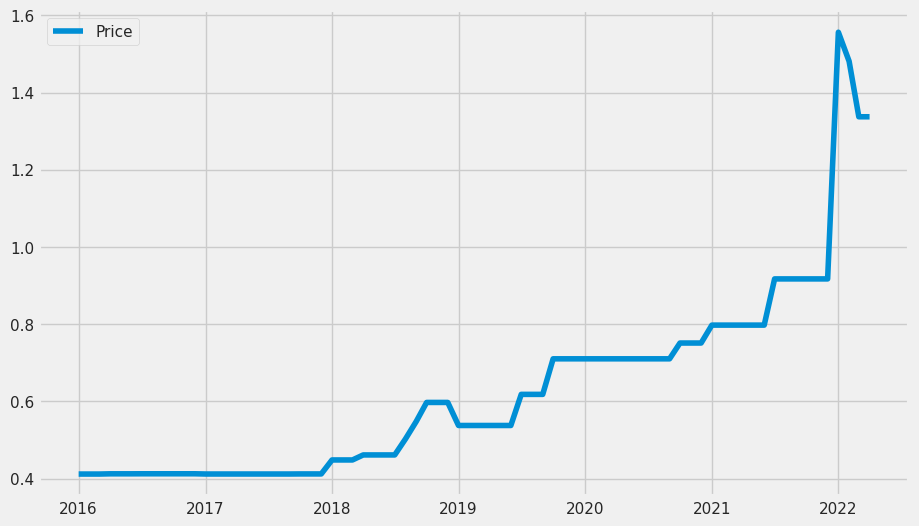

In [ ]:
#Fiyat artışının görselleştirilmesi
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
pd.plotting.register_matplotlib_converters()
fig = plt.figure(figsize=(10,6))
df_sub2 = df[df["Year"]>=2016].reset_index(drop=True)
df_sub2["Date"] = df_sub2.apply(lambda x: date_mapping(x), axis=1)
plt.plot(df_sub2.Date, df_sub2.Price)

plt.legend(["Price"])

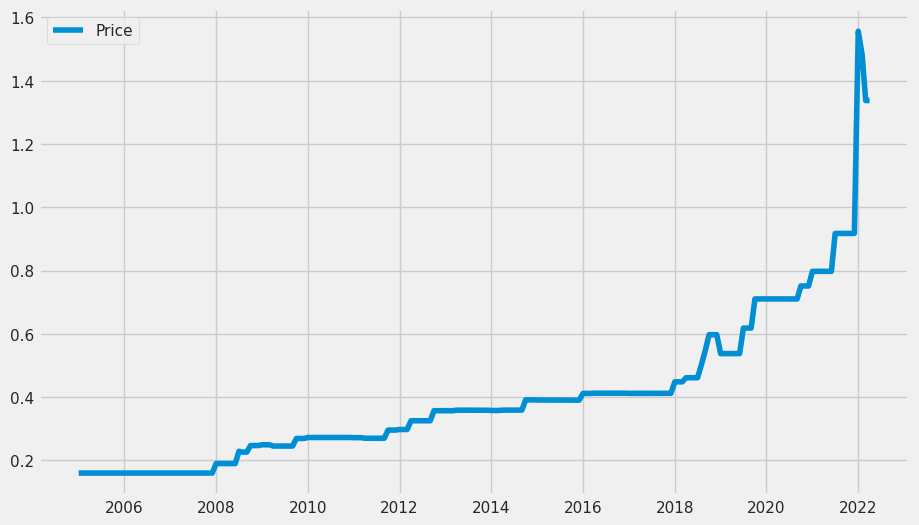

In [ ]:
#2005'ten beri fiyatlar nasıl değişti
plt.style.use("fivethirtyeight")
pd.plotting.register_matplotlib_converters()
fig = plt.figure(figsize=(10,6))

plt.plot(df_sub.set_index("Date"))
plt.legend(["Price"])

In [ ]:
df_sub.head(10)